In [11]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
MNT_gold_data = pd.read_csv('MNT_few_shot_gold_equal_length_without_commas_fullstops.csv')
MNT_gold_data.head(10)

,Unnamed: 0,id,token,gold_label
0,0,140358938139264,Northrop,<O>
1,1,140358938148096,Grumman,<O>
2,2,140358938137856,and,<O>
3,3,140358938146304,Airbus,<O>
4,4,140358944180608,parent,<O>
5,5,140358976254208,EADS,<O>
6,6,140358945256320,defeat,<EVENT>
7,7,140358938144768,Boeing,<O>
8,8,140358937971840,for,<O>
9,9,140358944192384,$,<O>


In [13]:
gold_tokens = MNT_gold_data['token']
gold_labels = MNT_gold_data['gold_label']

In [14]:
MNT_predicted_data = pd.read_csv('MNT_few_shot_predicted_equal_length_without_commas_fullstops.csv')
MNT_predicted_data.head(10)

,Unnamed: 0,id,token,predicted_label
0,0,140358938139264,Northrop,<O>
1,1,140358938148096,Grumman,<O>
2,2,140358938137856,and,<O>
3,3,140358938146304,Airbus,<O>
4,4,140358944180608,parent,<O>
5,5,140358976254208,EADS,<O>
6,6,140358945256320,defeat,<EVENT>
7,7,140358938144768,Boeing,<O>
8,8,140358937971840,for,<O>
9,9,140358944192384,$,<O>


In [15]:
predicted_tokens = MNT_predicted_data['token']
predicted_labels = MNT_predicted_data['predicted_label']

In [16]:
predicted_labels

0        <O>
1        <O>
2        <O>
3        <O>
4        <O>
        ... 
23969    <O>
23970    <O>
23971    <O>
23972    <O>
23973    <O>
Name: predicted_label, Length: 23974, dtype: object

In [17]:
gold_labels.value_counts()

<O>        19958
<EVENT>     4016
Name: gold_label, dtype: int64

In [18]:
predicted_labels.value_counts()

<O>        22020
<EVENT>     1954
Name: predicted_label, dtype: int64

In [19]:
# comparing the LLM's predicted labels to the gold standard
print(classification_report(gold_labels, predicted_labels))

              precision    recall  f1-score   support

     <EVENT>       0.90      0.44      0.59      4016
         <O>       0.90      0.99      0.94     19958

    accuracy                           0.90     23974
   macro avg       0.90      0.71      0.77     23974
weighted avg       0.90      0.90      0.88     23974



In [20]:
x = classification_report(gold_labels, predicted_labels)
with open('eval.txt', 'w', encoding = 'utf8') as outfile:
    outfile.write(x)

In [21]:
with open('eval.txt', encoding = 'utf8') as infile:
    text = infile.read()

In [22]:
print(text)

              precision    recall  f1-score   support

     <EVENT>       0.90      0.44      0.59      4016
         <O>       0.90      0.99      0.94     19958

    accuracy                           0.90     23974
   macro avg       0.90      0.71      0.77     23974
weighted avg       0.90      0.90      0.88     23974



In [23]:
confusion_matrix(gold_labels, predicted_labels)

array([[ 1760,  2256],
       [  194, 19764]], dtype=int64)

In [24]:
data_labels = unique_labels(gold_labels)
print(data_labels)

['<EVENT>' '<O>']


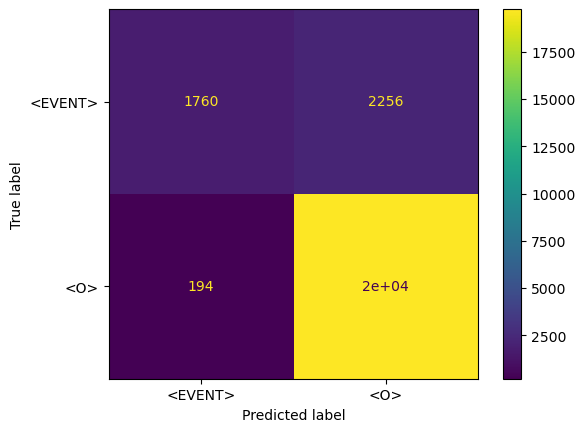

In [25]:
cm = confusion_matrix(gold_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_labels)
disp.plot();

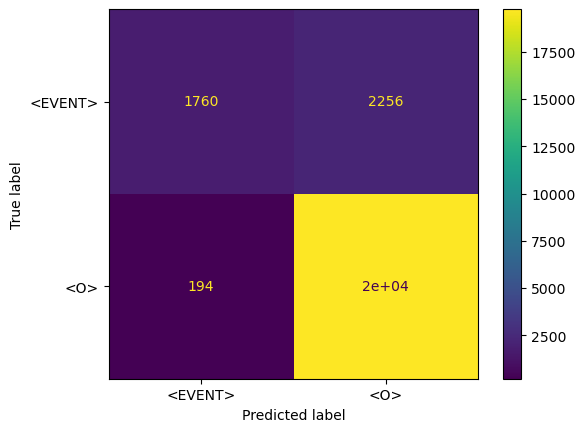

In [26]:
disp.plot().figure_.savefig('confusion_matrix.png')